# This notebook plots NASA's Global Surface Temperature data, from 1880 to present. 

For more details on global surface temperature changes and trends, see https://data.giss.nasa.gov/gistemp/

In [47]:
import requests
import io
import urllib3; urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Load the dataset

Global Surface Temperature history dataset (1880-present) is currently (10/22/2017) available on NASA's web site.

In [48]:
dataset = requests.get(url="https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv", verify=False).content 

In [49]:
dataset = io.StringIO(dataset.decode('utf8'))

In [50]:
data_df = pd.read_csv(dataset, skiprows=0, header=1)

Note: If you are unable to download the data set (e. g. due to connectivity problems, or if the data disappears from NAS web site), the repo includes a cached local copy of the data (downloaded on 10/21/2017, from https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv).

In [51]:
# data_df = pd.read_csv("GLB.Ts+dSST.csv", skiprows=0, header=1)

## Raw Global Surface Temperture dataset:

In [52]:
data_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.31,-0.20,-0.12,-0.21,-0.13,-0.25,-0.22,-0.11,-0.17,-.25,-.21,-.24,-.20,***,***,-0.15,-0.19,-.21
1,1881,-0.17,-0.19,0.02,0.03,0.01,-0.21,-0.08,-0.03,-0.15,-.22,-.23,-.12,-.11,-.12,-.20,0.02,-0.11,-.20
2,1882,0.13,0.13,0.03,-0.20,-0.17,-0.27,-0.22,-0.07,-0.11,-.26,-.17,-.26,-.12,-.11,.05,-0.11,-0.18,-.18
3,1883,-0.33,-0.40,-0.14,-0.18,-0.21,-0.14,-0.09,-0.16,-0.22,-.16,-.24,-.17,-.20,-.21,-.33,-0.18,-0.13,-.20
4,1884,-0.17,-0.10,-0.38,-0.44,-0.38,-0.42,-0.36,-0.27,-0.28,-.25,-.31,-.29,-.30,-.29,-.14,-0.40,-0.35,-.28
5,1885,-0.60,-0.31,-0.26,-0.43,-0.43,-0.45,-0.36,-0.32,-0.24,-.21,-.21,-.06,-.32,-.34,-.40,-0.37,-0.38,-.22
6,1886,-0.43,-0.46,-0.39,-0.29,-0.27,-0.40,-0.23,-0.35,-0.27,-.30,-.32,-.27,-.33,-.31,-.32,-0.32,-0.32,-.30
7,1887,-0.74,-0.54,-0.35,-0.40,-0.33,-0.25,-0.24,-0.33,-0.24,-.34,-.25,-.35,-.36,-.36,-.52,-0.36,-0.27,-.27
8,1888,-0.38,-0.37,-0.42,-0.23,-0.23,-0.20,-0.11,-0.17,-0.11,.00,.00,-.08,-.19,-.21,-.37,-0.29,-0.16,-.04
9,1889,-0.12,0.17,0.07,0.06,-0.04,-0.15,-0.11,-0.21,-0.23,-.24,-.34,-.31,-.12,-.10,-.01,0.03,-0.16,-.27


# 2. Clean up the data

In [53]:
data_df = data_df[:-1] # remove the current year (the data is still being collected)
data_df = data_df.drop(labels=['J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'], axis=1) # remove unnecessary columns

In [54]:
# Interpret monthly measurements as numeric / float32
months = list(data_df)[1:13]
data_df[months] = data_df[months].astype(np.float32)

# 2. Compute the totals, for each year

In [55]:
months = list(data_df)[1:13]
data_df["total"] = data_df[months].sum(axis=1)

In [88]:
trendline =  data_df["total"].rolling(8).mean()

## Cleaned up, computed data:

In [89]:
data_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,total
0,1880,-0.31,-0.20,-0.12,-0.21,-0.13,-0.25,-0.22,-0.11,-0.17,-0.25,-0.21,-0.24,-2.420000
1,1881,-0.17,-0.19,0.02,0.03,0.01,-0.21,-0.08,-0.03,-0.15,-0.22,-0.23,-0.12,-1.340000
2,1882,0.13,0.13,0.03,-0.20,-0.17,-0.27,-0.22,-0.07,-0.11,-0.26,-0.17,-0.26,-1.440000
3,1883,-0.33,-0.40,-0.14,-0.18,-0.21,-0.14,-0.09,-0.16,-0.22,-0.16,-0.24,-0.17,-2.440000
4,1884,-0.17,-0.10,-0.38,-0.44,-0.38,-0.42,-0.36,-0.27,-0.28,-0.25,-0.31,-0.29,-3.650000
5,1885,-0.60,-0.31,-0.26,-0.43,-0.43,-0.45,-0.36,-0.32,-0.24,-0.21,-0.21,-0.06,-3.880000
6,1886,-0.43,-0.46,-0.39,-0.29,-0.27,-0.40,-0.23,-0.35,-0.27,-0.30,-0.32,-0.27,-3.980000
7,1887,-0.74,-0.54,-0.35,-0.40,-0.33,-0.25,-0.24,-0.33,-0.24,-0.34,-0.25,-0.35,-4.360000
8,1888,-0.38,-0.37,-0.42,-0.23,-0.23,-0.20,-0.11,-0.17,-0.11,0.00,0.00,-0.08,-2.300000
9,1889,-0.12,0.17,0.07,0.06,-0.04,-0.15,-0.11,-0.21,-0.23,-0.24,-0.34,-0.31,-1.450000


# 3. Plot Global Surface Temperature

Text(0.5,1,u'Global Surface Temperature, 1880-present')

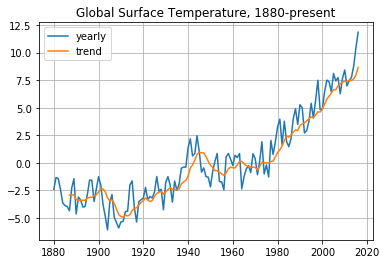

In [90]:
plt.plot(data_df["Year"], data_df["total"], label="yearly")
plt.plot(data_df["Year"], tl2, label='trend')
plt.grid(True)
plt.legend()
plt.title("Global Surface Temperature, 1880-present")

# 4. Conclusion
Gulp.